<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Clasificación con Python</font></h1>


En este cuaderno trataremos de practicar todos los algoritmos de clasificación aprendidos durante el curso.

Cargaremos un conjunto de datos mediante la librería Pandas, aplicaremos los siguientes algoritmos y encontraremos el mejor para este conjunto en específico con métodos precisos de evaluación.

Cargemos primero las librerías necesarias:


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import pylab as pl
import scipy.optimize as opt
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline



### Acerca del conjunto de datos


Este conjunto de datos es sobre prestamos pasados. El conjunto **Loan_train.csv** incluye detalles sobre 346 clientes cuyos prestamos estan pagados o pendientes de cobrar.

| Campo          | Descripción                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | El prestamos puede estar pagado o pendiente                                           |
| Principal      | Cantidad del prestamo principal                                                       |
| Terms          | Términos del cobro del prestamo, que pueden ser semanales, quincenales o mensuales    |
| Effective_date | La fecha cuando el prestamo fue creado                                                |
| Due_date       | Debido a que se programa para pagarse una sola vez, solo hay una fecha de vencimiento |
| Age            | Edad del solicitante                                                                  |
| Education      | Escolaridad del solicitante                                                           |
| Gender         | Genero del solicitante                                                                |


Descargemos el conjunto de datos


In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2023-05-21 22:40:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2023-05-21 22:40:51 (1003 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Cargar datos desde el archivo CSV


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convertir a un objeto de tipo fecha(date)/tiempo(time)


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Visualización de los Datos y pre procesamiento


Veamos cuantas de cada clase existen en el conjunto de datos.


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 personas han saldado el préstamo a tiempo, mientras 86 han sido llamados a pagar


Grafiquemos algunas columnas para entender mejor los datos:


In [7]:
# observación: la instalación de seaborn puede tomar algunos minutos
!conda install -c anaconda seaborn -y

/bin/bash: conda: command not found


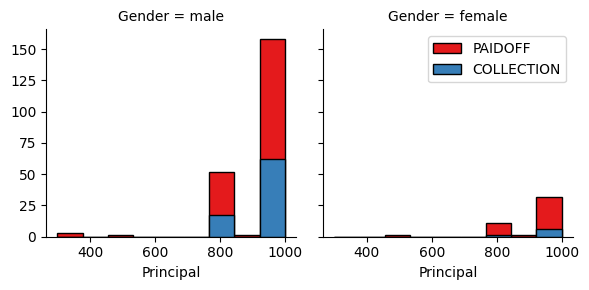

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

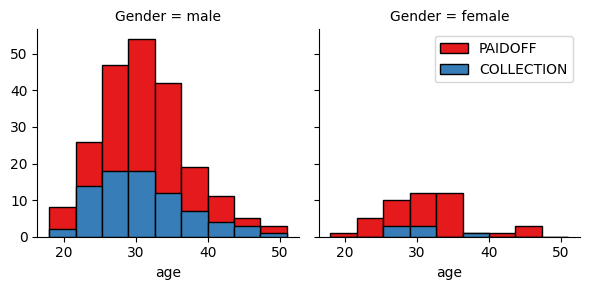

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre procesamiento: selección/extracción de características


### Veamos el día de la semana en que la gente obtuvo el préstamo


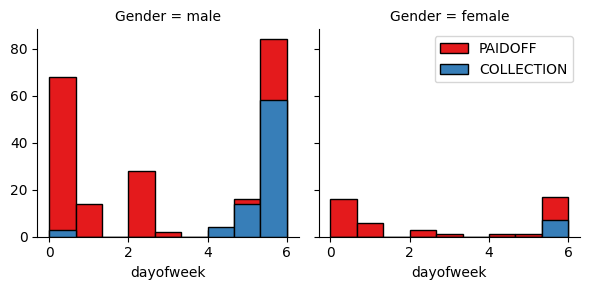

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Observamos que la gente que obtuvo el préstamo al final de la semana no lo pagó. Utilicemos la binarización para establecer unos valores límite menores de 4


In [11]:

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convertir características categóricas en valores numéricos


Observemos la característica de genero:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% de las mujeres pagan sus prestamos mientras que el 73% de los hombres lo hacen.


Convirtamos en 0 a los hombres y a las mujeres en 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Codificación One Hot

#### ¿Qué hay acerca de la educación?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Característica antes de la codificación One Hot


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Utilice la técnica de codificación One Hot para transformar las variables categóricas en binarias y agrégelas al dataframe de características


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Selección de característica


Definamos los conjuntos de características, X (Variable(s) dependiente(s) ):


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


¿Cuales son nuestras etiquetas? (Variable dependiente u objetivo)


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Datos Normalizados


La estandarización de los datos le da a estos una media de cero y varianza con valor de la unidad (tecnicamente debería hacerse despues de la división entre grupos de prueba y entrenamiento)


In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Clasificación


Ahora es su turno, utilice el conjunto de entrenamiento para construir un modelo preciso. Despues use el conjunto de validación para reportar la precisión del modelo.
Deberá utilizar el siguiente algoritmo:

*   K Nearest Neighbor(KNN)
*   Arbol de Decisión
*   Maquina de Soporte Vectorial (SVM)
*   Regresión Logística

**Observaciónes:**

*   Puede ir arriba y cambiar el pre procesamiento, la selección y extracción de características, etc, para mejorar el modelo.
*   Deberá utilizar alguna de las librerías para el desarrollo de algoritmos de clasificación; ya sea scikit-learn, Scipy o Numpy
*   Deberá incluir el código del algoritmo en las siguientes celdas.


# K Nearest Neighbor(KNN)

Observación: Deberá encontrar el mejor valor de k para construir el modelo con la mejor eficacia.
**Advertencia:** No deberá utilizar **loan_test.csv** para encontrar el mejor valor de k, sin embargo, puede dividir train_loan.csv para entrenamiento y pruebas para encontrar el mejor valor de **k**.


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (276, 8) (276,)
Set de Prueba: (70, 8) (70,)


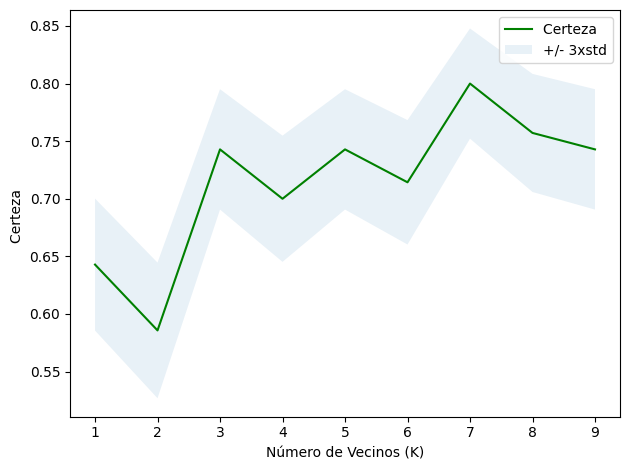

La mejor aproximación de certeza fue con  0.8 con k= 7


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

In [23]:
k = 7
#Entrenar el Modelo y Predecir  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [24]:
#classification accuracy score computa la certeza del subconjunto. Esta función es igual a la función jaccard_similarity_score:

from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.8043478260869565
Probar el set de Certeza:  0.8


In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8

In [26]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label =  'PAIDOFF')

0.7741935483870968

# Arbol de Decisión


In [27]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [28]:
k=10
mean_dec = np.zeros((k-1))

for n in range(1,k):

  drugTree = DecisionTreeClassifier(criterion="entropy", max_depth =n)
  drugTree.fit(X_train,y_train)
  predTree = drugTree.predict(X_test)
  mean_dec[n-1] = np.mean(predTree==y_test)
mean_dec


array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286])

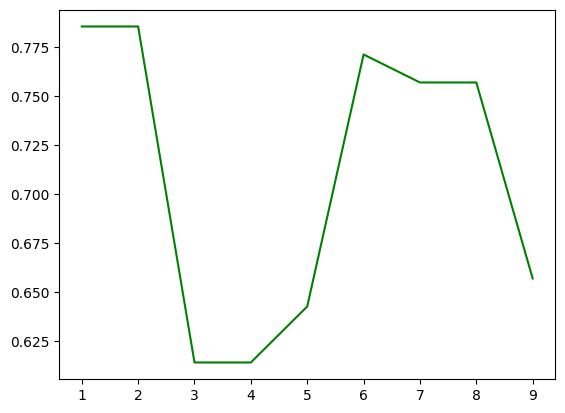

In [29]:
plt.plot(range(1,k),mean_dec,'g')

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
dec_acc = accuracy_score(y_test, predTree)
print( "La mejor precisión fué", mean_dec.max())
print()
print(classification_report(y_test, predTree))

La mejor precisión fué 0.7857142857142857

              precision    recall  f1-score   support

  COLLECTION       0.29      0.40      0.33        15
     PAIDOFF       0.82      0.73      0.77        55

    accuracy                           0.66        70
   macro avg       0.55      0.56      0.55        70
weighted avg       0.70      0.66      0.68        70



In [31]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.8

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")

0.7741935483870968

# Maquina de Soporte Vectorial (SVM)


In [33]:
import pylab as pl
import scipy.optimize as opt
from sklearn import svm

In [35]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
yhat [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [36]:
#f1_score de la librería sklearn:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7275882012724117

In [37]:
 #Índice jaccard
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat ,pos_label ='COLLECTION'))
print(jaccard_score(y_test, yhat ,pos_label ='PAIDOFF'))

0.18181818181818182
0.7272727272727273


# Regresión Logística


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [41]:
yhat = LR.predict(X_test)


In [43]:
yhat_prob = LR.predict_proba(X_test)


In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6670522459996144

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label = "PAIDOFF")

0.6764705882352942

In [46]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5772287609479654

# Evaluación del Modelo con el Conjunto de Prueba


In [47]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Primero descarge y carge el conjunto de pruebas:


In [48]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2023-05-21 22:46:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2023-05-21 22:46:29 (1008 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Cargar el conjunto de prueba para la evaluación


In [49]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [50]:
test_df = pd.read_csv('loan_test.csv')
#Cambiar el formato de fecha
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
#Agregar una columna que especifica si es fin de semana  o no
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# Convertir genero en valores binarios
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# Crear un Dataframe 'Featuretest' con las variables independientes y concatenar con la columna 'education' codificada en oneHot-encoding.
Featuretest = test_df[['Principal','terms','age','Gender','weekend']]
Featuretest = pd.concat([Featuretest,pd.get_dummies(test_df['education'])], axis=1)
#De la columna 'education' codificada en oneHot-encoding eliminamos'Master or Above'
Featuretest.drop(['Master or Above'], axis = 1,inplace=True)
Featuretest.head()

#Definamos los conjuntos de características, X_test(Variable(s) dependiente(s) ):
XT = Featuretest
#Definamos la variable objetivo 'y'dependiente:
yT = test_df['loan_status'].values

#Normalizamos los datos
XT= preprocessing.StandardScaler().fit(XT).transform(XT)
#test_df.head()

In [55]:
#K Nearest Neighbor(KNN)
yhat = neigh.predict(XT)
yhat[0:5]
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_score
print('jaccard:',jaccard_score(yT, yhat,pos_label =  'PAIDOFF'))

f1_score: 0.6602254428341383
jaccard: 0.6666666666666666


In [56]:
#Arbol de Decisión
predTree = drugTree.predict(XT)
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_score
print('jaccard:',jaccard_score(yT, yhat,pos_label =  'PAIDOFF'))

f1_score: 0.6602254428341383
jaccard: 0.6666666666666666


In [57]:
#Maquina de Soporte Vectorial (SVM)
yhat = clf.predict(XT)
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_score
print('jaccard:',jaccard_score(yT, yhat,pos_label =  'PAIDOFF'))

f1_score: 0.7583503077293734
jaccard: 0.78


In [58]:
#Regresión Logística
yhat = LR.predict(XT)
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_score
print('jaccard:',jaccard_score(yT, yhat,pos_label =  'PAIDOFF'))
from sklearn.metrics import log_loss
yhat_prob2 = LR.predict_proba(XT)
print('log_loss:',log_loss(yT, yhat_prob2))

f1_score: 0.6604267310789049
jaccard: 0.7358490566037735
log_loss: 0.5672153379912981


# Reporte

Deberá reportar la precisión del modelo utilizando distintas métricas de evaluación:


| Algoritmo           | Jaccard | F1     | LogLoss |
| ------------------- | ------- | --     | ------- |
| KNN                 |0.666     |0.660      | NA      |
| Arbol de Decisión   |0.666     |0.660      | NA      |
| SVM                 |0.78      |0.758      | NA      |
| Regresión Logística |0.735     |0.660      | 0.567   |


<h2>¿Quiere aprender mas?</h2>

IBM SPSS Modeler es una plataforma para el análisis que contiene muchos algoritmos de aprendizaje automático (machine learning). Ha sido diseñado con el fin de ofrecer predicciones inteligentes a las decisiones hechas por personas, grupos, sistemas - con la compañia como un todo. Una prueba gratuita esta disponible a traves de este curso desde aqui: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos cuardernos mas rápido y con conjuntos de datos mas grandes. Watson Studio es la solución líder de IBM en la nube para científicos de datos, contruido por científicos de datos. Con los cuadernos de Jupyter, RStudio, Apache Spark y librerías pre instaladas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin necesidad de instalar nada. Unase a la gran comunidad de usuarios de Watson Studio hoy con un cuenta gratuita en <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Watson Studio</a>

<h3>Gracias por terminar esta lección</h3>

<h4>Autor:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD es un Científico de Datos para IBM con una trayectoria de desarrollo de aplicaciones a nivel empresarial que han ayudado a mejorar la habilidad de transformar información en conocimiento practico. Es un investigador en el campo de la minería de datos y experto en el desarrollo de métodos analíticos avanzados como son el aprendizaje automático y el modelado estadístico de grandes conjuntos de datos.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">MIT License</a>.</p>
